In [72]:
# initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

In [85]:
# define o comprimento da string de n bits
n = 3

# define o tipo do oraculo, b para balanceado e c para constante.
oracle = "b"

# define o valor de b para um oráculo balanceado
if oracle == "b":
    #b =  np.random.randint(1,2**n)
    b =  7


# escolhe um valor randomicamente para c se o oráculo for constante
if oracle == "c":
    c = 0

In [86]:
# Criando os registros
# n qubits for querying the oracle and one qubit for storing the answer
qr = QuantumRegister(n+1) # n qubits para consulta no oráculo e 1 qubit para armazenar a resposta
cr = ClassicalRegister(n) # 1 bit clássico para medição do resultado

djCircuit = QuantumCircuit(qr, cr)


# configurando o ultimo qubit para o estado |1>
djCircuit.x(qr[n])

# Barreira
djCircuit.barrier()
# -----------------------------------------


# Apply Hadamard gates to all qubits
djCircuit.h(qr)    

# Barreira
djCircuit.barrier()
# -----------------------------------------

# Query the oracle 
if oracle == "c": 
    if c == 1:
        djCircuit.x(qr[n])
    else:
        djCircuit.iden(qr[n])
else: 
    for i in range(n):
        if (b & (1 << i)):
            djCircuit.cx(qr[i], qr[n])

# Barreira
djCircuit.barrier()
# -----------------------------------------


for i in range(n):
    djCircuit.h(qr[i])

    
# Measure the first register
for i in range(n):
    djCircuit.measure(qr[i], cr[i])

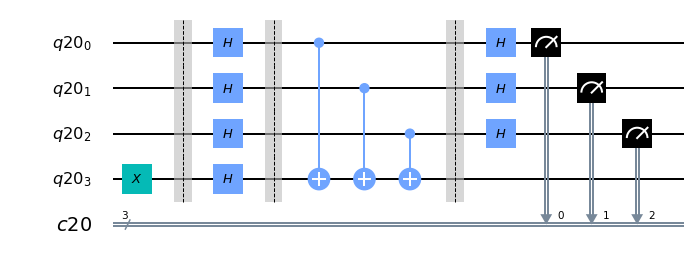

In [87]:
djCircuit.draw(output='mpl')

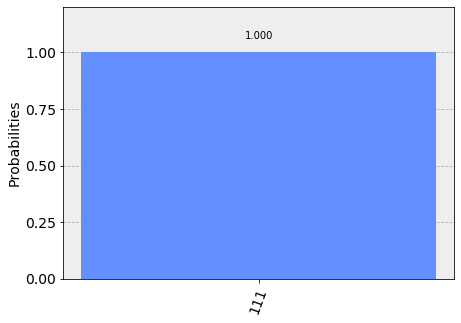

In [88]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(djCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)